# Problem Statement


The CarDekho company maintains a database of the cars sold through their platform. The data represents the cars sold by Car Dekho and the car related features. We have to build a linear regression model to predict the Selling price of the car. Calculate all the error metrics and diagnostic plots to check the regression result. The dataset contains data for around 301 cars sold by CarDekho.



# Data Description:

Car_Name: Name of the cars.

Year: Year of the car when it was bought.

Selling_Price: Price at which the car is being sold.

Present_Price: Current ex-showroom price of the car.

Kms_Driven: Distance completed by the car in km.

Fuel_Type: Fuel type of the car.

Seller_Type: Tells if a Seller is Individual or a Dealer.

Transmission: Gear transmission of the car (Automatic/Manual).

Owner: Number of previous owners of the car.

# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 2. Data Preparation

In [2]:
dataset=pd.read_csv("C:/Users/91898/Desktop/prism work/prism_assignment/Regression/car data.csv")

# 2.1 Understand the  data

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
len(dataset)

301

In [5]:
dataset.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
len(dataset.columns)

9

# 2.2 Exploratory Data Analysis

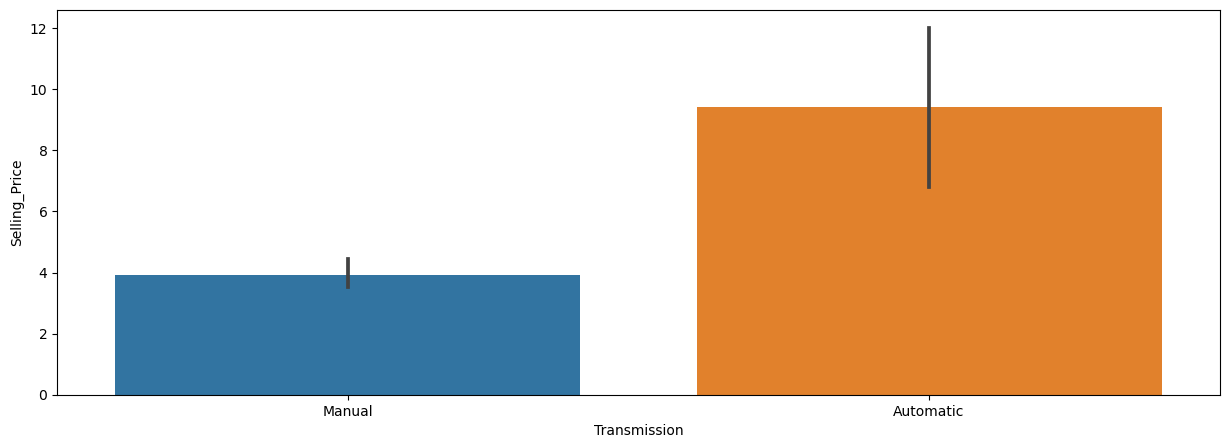

In [7]:
plt.figure(figsize=(15,5))
sns.barplot(data=dataset,y='Selling_Price',x='Transmission')
plt.show()

 Automatic cars have higher selling price

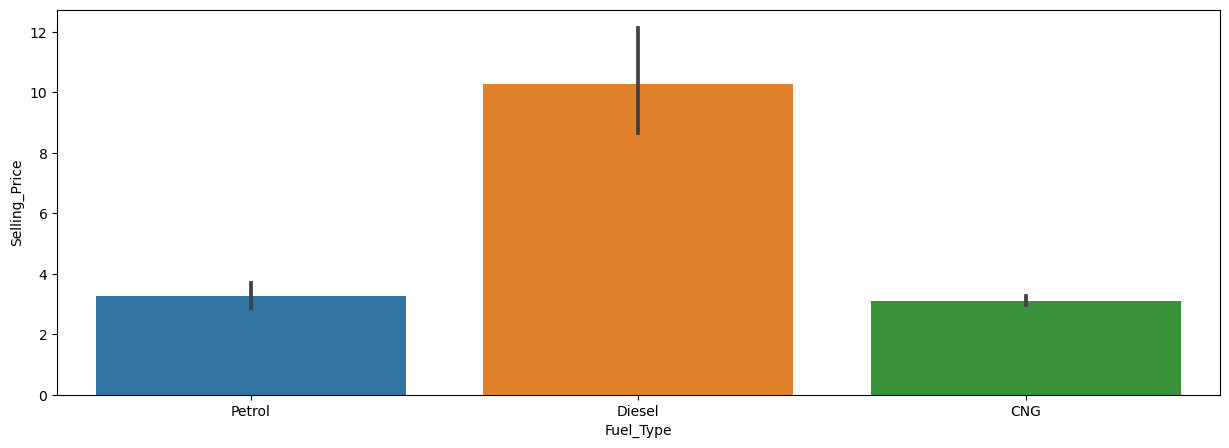

In [8]:
plt.figure(figsize=(15,5))
sns.barplot(data=dataset,y='Selling_Price',x='Fuel_Type')
plt.show()

Diesel  cars has higher selling price

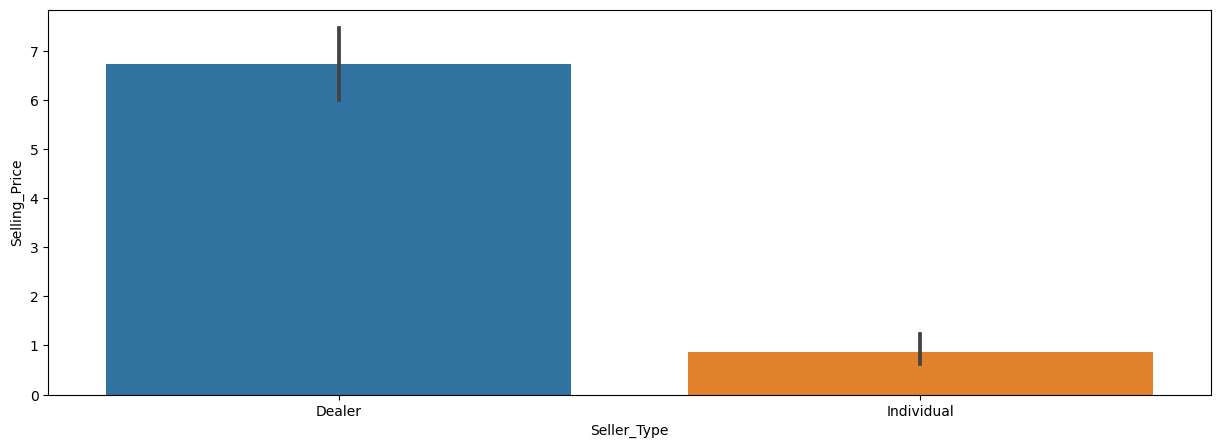

In [9]:
plt.figure(figsize=(15,5))
sns.barplot(data=dataset,y='Selling_Price',x='Seller_Type')
plt.show()

dealers are having higher selling price 

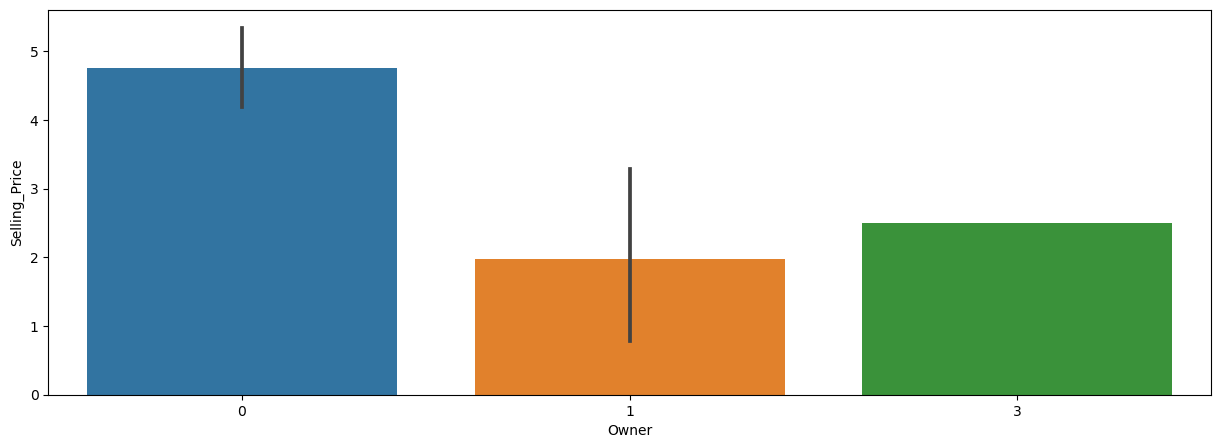

In [10]:
plt.figure(figsize=(15,5))
sns.barplot(data=dataset,y='Selling_Price',x='Owner')
plt.show()

In [11]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


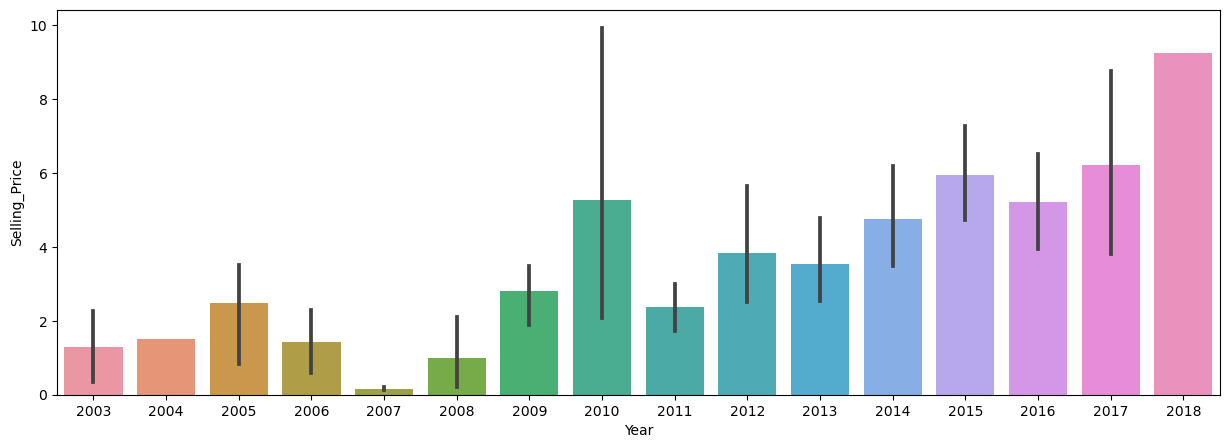

In [12]:
plt.figure(figsize=(15,5))
sns.barplot(data=dataset,y='Selling_Price',x='Year')
plt.show()

<Figure size 1500x500 with 0 Axes>

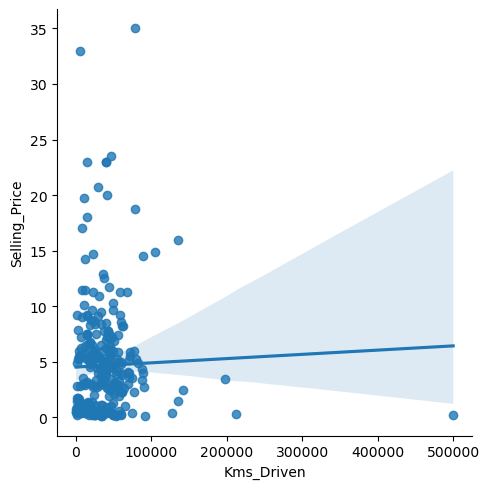

In [13]:
plt.figure(figsize=(15,5))
sns.lmplot(data=dataset,y='Selling_Price',x='Kms_Driven')
plt.show()

lesser the km_driven , higher the selling price is

# 2.3 Outlier Treatment

In [14]:
def outlier_treatment(dataframe):
    Q1=dataframe.quantile(0.25)
    Q3=dataframe.quantile(0.75)
    IQR=Q3-Q1
    df_rem_out=dataframe[~((dataframe<(Q1-1.5*IQR))| (dataframe>(Q3+1.5*IQR))).any(axis=1)] #removing outliers
    
    return df_rem_out
dataset=outlier_treatment(dataset)
    

C:\Users\91898\AppData\Local\Temp\ipykernel_35084\3389991848.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_rem_out=dataframe[~((dataframe<(Q1-1.5*IQR))| (dataframe>(Q3+1.5*IQR))).any(axis=1)] #removing outliers


In [15]:
len(dataset)

264

# 2.4 Missing Value Treatment

In [16]:
#checking the count of the missing value percentage
dataset.isnull().sum()/len(dataset)*100

Car_Name         0.0
Year             0.0
Selling_Price    0.0
Present_Price    0.0
Kms_Driven       0.0
Fuel_Type        0.0
Seller_Type      0.0
Transmission     0.0
Owner            0.0
dtype: float64

no  missing values found

# 2.5 Encoding

In [17]:
#separating the numerical and categorical columns
def data_type(dataset):
    numerical=[]
    categorical=[]
    for i in dataset.columns:
        if dataset[i].dtype=='int64' or dataset[i].dtype=='float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical,categorical
numerical,categorical=data_type(dataset)

#identifying the binary columns and ignoring them from scaling
def binary_columns(df):
    binary_cols=[]
    for col in   df.select_dtypes(include=['int','float']).columns:
        unique_values=df[col].unique()
        if  np.in1d(unique_values,[0,1]).all():
            binary_cols.append(col)
    return binary_cols
binary_cols=binary_columns(dataset)
#remove the binary columns from numerical columns
numerical=[i for  i in numerical if i not in binary_cols]

def encoding(dataset,categorical):
    for i in categorical:
        dataset[i]=dataset[i].astype('category')
        dataset[i]=dataset[i].cat.codes
    return dataset
dataset=encoding(dataset,categorical)
    
        

In [18]:
dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,81,2014,3.35,5.59,27000,2,0,1,0
1,84,2013,4.75,9.54,43000,1,0,1,0
2,61,2017,7.25,9.85,6900,2,0,1,0
3,87,2011,2.85,4.15,5200,2,0,1,0
4,83,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,62,2016,9.50,11.60,33988,1,0,1,0
297,60,2015,4.00,5.90,60000,2,0,1,0
298,62,2009,3.35,11.00,87934,2,0,1,0
299,62,2017,11.50,12.50,9000,1,0,1,0


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       264 non-null    int8   
 1   Year           264 non-null    int64  
 2   Selling_Price  264 non-null    float64
 3   Present_Price  264 non-null    float64
 4   Kms_Driven     264 non-null    int64  
 5   Fuel_Type      264 non-null    int8   
 6   Seller_Type    264 non-null    int8   
 7   Transmission   264 non-null    int8   
 8   Owner          264 non-null    int64  
dtypes: float64(2), int64(3), int8(4)
memory usage: 13.4 KB


# 2.6 Splitting the data into train and test

In [72]:
x=dataset.iloc[:,[1,2,4,5,6,7,8]].values

In [73]:
y=dataset.iloc[:,3].values

In [74]:
len(x)

264

In [75]:
len(y)

264

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [25]:
from sklearn.linear_model import  LinearRegression
#fitting the model
regressor_ini=LinearRegression()
regressor_ini.fit(x_train,y_train)

#Returning the R^2 for the model
regressor_ini_R2=regressor_ini.score(x_train,y_train)
print('R^2 : {0}'.format(regressor_ini_R2))

R^2 : 0.8567323221272564


In [26]:
def calculate_residuals(model,features,label):
    #create predictions on the features with the model and calculates resuduals
    predictions=model.predict(features)
    df_results=pd.DataFrame({'Actual': label,'predicted': predictions})
    df_results['Residuals']=abs(df_results['Actual'])-abs(df_results['predicted'])
    return df_results

In [27]:
df_results=calculate_residuals(regressor_ini,x_train,y_train)
df_results

,Actual,predicted,Residuals
0,18.61,11.412602,7.197398
1,0.94,3.194219,-2.254219
2,1.90,1.433067,0.466933
3,0.52,1.940217,-1.420217
4,1.50,2.014602,-0.514602
...,...,...,...
179,13.60,13.379279,0.220721
180,0.82,0.743547,0.076453
181,1.47,0.309039,1.160961
182,0.95,-0.479965,0.470035


In [28]:

def linear_assumption(model,features,label):
    print('Assumption 1 : Linear Relationship between the Target and the feature','\n')
    print('Checking with a scatter plot of actual vs  predicted.','Predictions should follow the diagonal line')
    #calculating residuals for the plot
    df_results=calculate_residuals(model,features,label)
    #plotting the actual vs  predicted values
    sns.lmplot(x='Actual',y='predicted',data=df_results,fit_reg=False)
    #plotting the diagonal line
    line_coords=np.arange(df_results.min().min(),df_results.max().max())
    plt.plot(line_coords,line_coords,color='darkorange',linestyle='--')
    plt.title('Actual Vs Predicted')
    plt.show()
   

Assumption 1 : Linear Relationship between the Target and the feature 

Checking with a scatter plot of actual vs  predicted. Predictions should follow the diagonal line


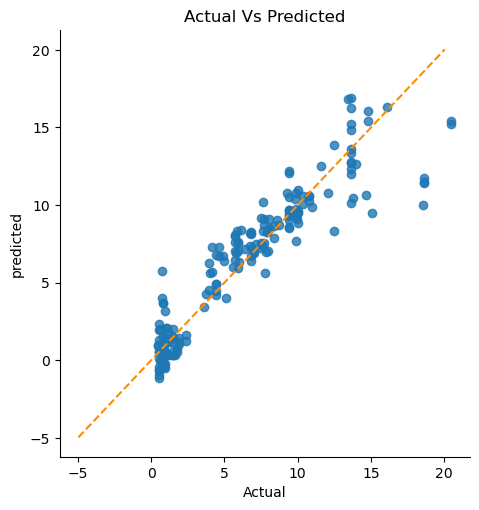

In [29]:
linear_assumption(regressor_ini,x_train,y_train)

In [30]:
def normal_errors_assumption(model,features,label,p_value_thresh=0.05):
    """
    
    Normality : Assumes that the error terms are normally distributed.If they are not, nonlinear transformation of variables may solve this.
    This assumption being violated primarily causes issues with the confidence level
    
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2 : The  error terms are normally distributed','\n')
    
    #calculating  residuals for the Anderson-Darling Test
    df_results=calculate_residuals(model,features,label)
    
    print('using the Anderson-Darling test for normal distribution')
    #performing the test on the residuals
    p_value=normal_ad(df_results['Residuals'])[1]
    print('p_value from the test - below 0.05 generally means non-normal',p_value)
    
    #Reporting the normality of the residuals
    if p_value<p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    #plotting the residual distribution
    plt.subplots(figsize=(12,6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value>p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence level will likely be affected')
        print('Try performing nonlinear transformations on variables')

Assumption 2 : The  error terms are normally distributed 

using the Anderson-Darling test for normal distribution
p_value from the test - below 0.05 generally means non-normal 1.5221481585092127e-16
Residuals are not normally distributed


C:\Users\91898\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


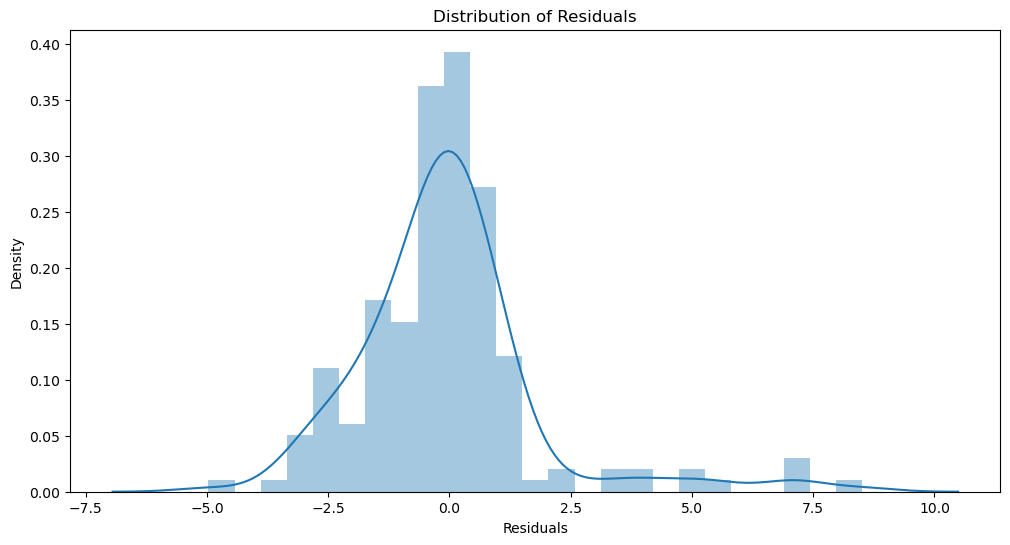


Assumption not satisfied

Confidence level will likely be affected
Try performing nonlinear transformations on variables


In [31]:
normal_errors_assumption(regressor_ini,x_train,y_train)

In [60]:
def multicollinearity_assumption(model, features, label, feature_names=None):
    """
    Multicollinearity: Assumes that predictors are not correlated with each other. If there 
    is correlation among the predictors, then either remove predictors with high variance
    Inflation factor (VIF) values or perform dimensionality reduction.
    
    The assumption being violated causes issues with the interpretability of the
    coefficients and the standard errors of the coefficients.
    """
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    print('Assumption 3: Little to no multicollinearity among predictors')
    
    # Plotting the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation of variables')
    plt.show()
    
    print('Variance Inflation Factor (VIF)')
    print('>10 : An indication that multicollinearity may be present')
    print('>100 : Certain multicollinearity among the variables')
    print("------------------------------------------------------------------")
    
    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data["Feature"] = feature_names if feature_names else [f"X{i}" for i in range(features.shape[1])]
    vif_data["VIF"] = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    
    # Display VIF values
    print(vif_data)
    print()
    
    # Checking multicollinearity
    definite_multicollinearity = sum(vif_data["VIF"] > 100)
    possible_multicollinearity = sum(vif_data["VIF"] > 10)
    
    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print("Assumption satisfied")
        else:
            print("Assumption possibly satisfied")
            print('Coefficient interpretability may be problematic')
            print("Consider removing variables with high variance inflation factor (VIF)")
    else:
        print("Assumption not satisfied")
        print('Coefficient interpretability may be problematic')
        print("Consider removing variables with high variance inflation factor (VIF)")


In [81]:
#gotta look at this again

Assumption 3: Little to no multicollinearity among predictors


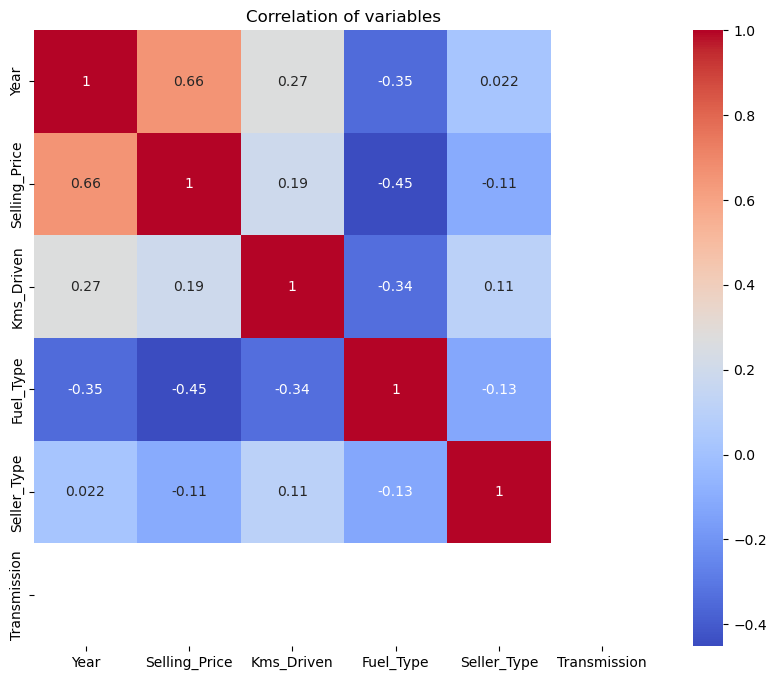

Variance Inflation Factor (VIF)
>10 : An indication that multicollinearity may be present
>100 : Certain multicollinearity among the variables
------------------------------------------------------------------
VIF values: [11.767033308565976, 4.801856706515059, 3.380615722381825, 8.542606962290622, 10.460806294902437, nan]

Assumption possibly satisfied
Coefficient interpretability may be problematic
Consider removing variables with high variance inflation factor (VIF)


C:\Users\91898\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [80]:
multicollinearity_assumption(regressor_ini,x_train,y_train,dataset.iloc[:,[1,2,4,5,6,7]].columns.values)


In [38]:
def  autocorrelation_assumption(model,features,label):
    """"
    If there is autocorrelaation, then there is a pattern that is not
    explained due to current value dependent on previous value.This 
    may be resolved by adding a lag variable of either the dependent or
    some of the predictors.
    """
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 4: No Autocorrelation','\n')
    #calculating residuals for the durbin watson test
    df_results=calculate_residuals(model,features,label)
    print('Performing Durbin Watson test ','\n')
    print('Values of 1.5 < d < 2.5 , generally  show that there is no autocorrelation in the data','\n')
    print('0 to 2 < positive autocorrelation')
    print('> 2 to 4 is negative autocorrelation ')
    print('------------------------------------------------------------------------------------------------------------')
    durbin_watson=durbin_watson(df_results['Residuals'])
    print("Durbin Watson",durbin_watson)
    if durbin_watson<1.5:
        print('Signs of positive autocorrelation','\n')
        print("Assumption not satisfied",'\n')
    elif durbin_watson>2.5:
        print('Signs of negative autocorrelation','\n')
        print("Assumption not satisfied",'\n')
    else:
        print('Assumption satisfied','\n')
        print('little to no autocorrelation','\n')

In [39]:
autocorrelation_assumption(regressor_ini,x_train,y_train)

Assumption 4: No Autocorrelation 

Performing Durbin Watson test  

Values of 1.5 < d < 2.5 , generally  show that there is no autocorrelation in the data 

0 to 2 < positive autocorrelation
> 2 to 4 is negative autocorrelation 
------------------------------------------------------------------------------------------------------------
Durbin Watson 1.8988963148893063
Assumption satisfied 

little to no autocorrelation 



In [42]:
def homoscedasticity_assumption(model,features,label):
    """ 
    Assumes that errors exhibit constant variance
    """
    print('Assumption 5 : Homoscedasticity of error terms','\n')
    print('Residuals should have relative constant  variance','\n')
    #calculating residuals for the plot
    df_results=calculate_residuals(model,features,label)
    #plotting the residuals
    plt.subplots(figsize=(12,6))
    ax=plt.subplot(111)
    plt.scatter(x=df_results.index,y=df_results.Residuals,alpha=.5)
    plt.plot(np.repeat(0,df_results.index.max()),color='blue',linestyle='--')
    ax.spines['right'].set_visible(False) #removing  the right  spine
    ax.spines['top'].set_visible(False) #removing the top spine
    plt.title('Residuals')
    plt.show
    
    

Assumption 5 : Homoscedasticity of error terms 

Residuals should have relative constant  variance 



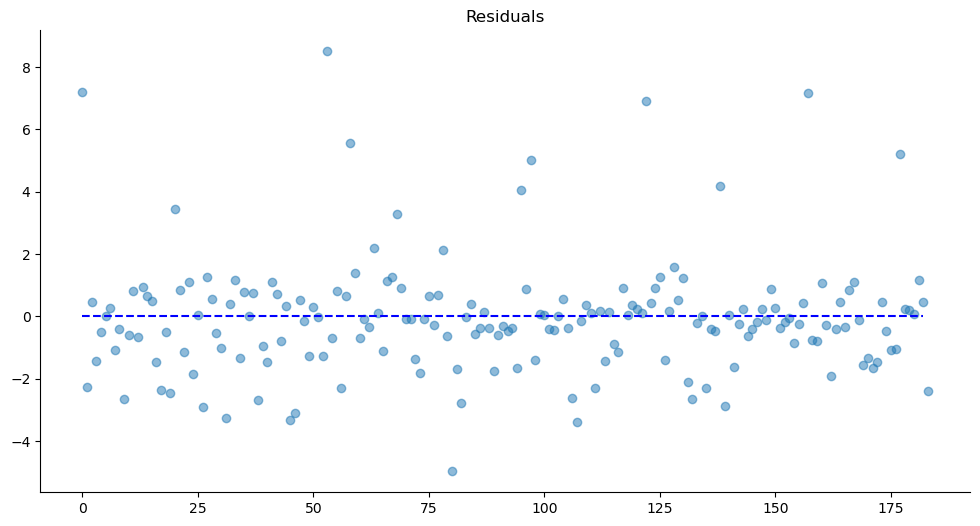

In [43]:
homoscedasticity_assumption(regressor_ini,x_train,y_train)

# 7. Building the MLR Model

In [42]:
#adding constant 1 to get the y-intercept value
x_train=np.append(arr=x_train,values=np.ones((264,1)).astype(int),axis=1)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 184 and the array at index 1 has size 264

In [46]:
# Get the number of rows in x_train
num_rows = x_train.shape[0]  # This should be 184
print(num_rows)
# Create a column of ones with the same number of rows as x_train
ones_column = np.ones((num_rows, 1)).astype(int)

# Concatenate the ones column to x_train
x_train = np.append(arr=x_train, values=ones_column, axis=1)


184


In [47]:
x_test=np.append(arr=x_test,values=np.ones((264,1)).astype(int),axis=1)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 80 and the array at index 1 has size 264

In [49]:
# Get the number of rows in x_test
num_rows = x_test.shape[0]  # This should be 80
print(num_rows)
# Create a column of ones with the same number of rows as x_test
ones_column = np.ones((num_rows, 1)).astype(int)

# Append the column of ones to x_test
x_test = np.append(arr=x_test, values=ones_column, axis=1)


80


In [50]:
import statsmodels.api as sm

In [51]:
regressor_ini=sm.OLS(endog=y_train,exog=x_train).fit()

In [52]:
regressor_ini.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     176.4
Date:                Thu, 29 Aug 2024   Prob (F-statistic):           6.22e-72
Time:                        17:12:14   Log-Likelihood:                -377.84
No. Observations:                 184   AIC:                             769.7
Df Residuals:                     177   BIC:                             792.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.3661      0.082     -4.473      0.000      -0.528      -0.205
x2             1.2811      0.078     16.506      0.000       1.128       1.434
x3          3.389e-05   9.61e-06      3.526      0.001    1.49e-05    5.29e-05
x4             0.8788      0.373      2.356      0.020       0.143       1.615
x5            -1.2484      0.499     -2.500      0.013      -2.234      -0.263
x6             0.1287      0.513      0.251      0.802      -0.883       1.140
const       7.943e-12   1.78e-12      4.465      0.000    4.43e-12    1.15e-11
x7           245.3939     54.961      4.465      0.000     136.931     353.857
x8           245.3939     54.961      4.465      0.000     136.931     353.857
x9           245.3939     54.961      4.465      0.000     136.931     353.857
==============================================================================
Omnibus:                       68.560   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.078
Skew:                           1.471   Prob(JB):                     5.45e-52
Kurtosis:                       7.705   Cond. No.                     1.00e+24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.67e-37. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [53]:
y_pred_ini=regressor_ini.predict(x_test)

ValueError: shapes (80,9) and (10,) not aligned: 9 (dim 1) != 10 (dim 0)

In [54]:
# Get the number of rows in x_test
num_rows_test = x_test.shape[0]

# Create a column of ones with the same number of rows as x_test
ones_column_test = np.ones((num_rows_test, 1)).astype(int)

# Append the column of ones to x_test
x_test = np.append(arr=x_test, values=ones_column_test, axis=1)

# Check shapes to ensure alignment
print(f"x_train shape: {x_train.shape}")  # Should output (num_samples_train, num_features + 1)
print(f"x_test shape: {x_test.shape}")    # Should output (num_samples_test, num_features + 1)

# Proceed with prediction
y_pred_ini = regressor_ini.predict(x_test)


x_train shape: (184, 10)
x_test shape: (80, 10)


# 7.2 MLR Model after removing insignificant variables

In [65]:
x=dataset.iloc[:,[0,2,4,5,7,8]].values
y=dataset.iloc[:,3:4].values

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [67]:
regressor_tuned=sm.OLS(endog=y_train,exog=x_train).fit()

In [68]:
y_pred_tuned=regressor_tuned.predict(x_test)

In [69]:
regressor_tuned.summary()

C:\Users\91898\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              837.8
Date:                Thu, 29 Aug 2024   Prob (F-statistic):                   4.10e-122
Time:                        17:36:18   Log-Likelihood:                         -334.09
No. Observations:                 184   AIC:                                      678.2
Df Residuals:                     179   BIC:                                      694.3
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0141      0.006      2.240      0.026       0.002       0.027
x2             1.1601      0.049     23.719      0.000       1.064       1.257
x3          4.579e-05   5.58e-06      8.198      0.000    3.48e-05    5.68e-05
x4            -0.2684      0.175     -1.536      0.126      -0.613       0.076
x5            -0.3777      0.373     -1.013      0.312      -1.114       0.358
const               0          0        nan        nan           0           0
==============================================================================
Omnibus:                       59.896   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.507
Skew:                           1.299   Prob(JB):                     7.06e-42
Kurtosis:                       7.238   Cond. No.                          inf
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# 8 Model Evaluation

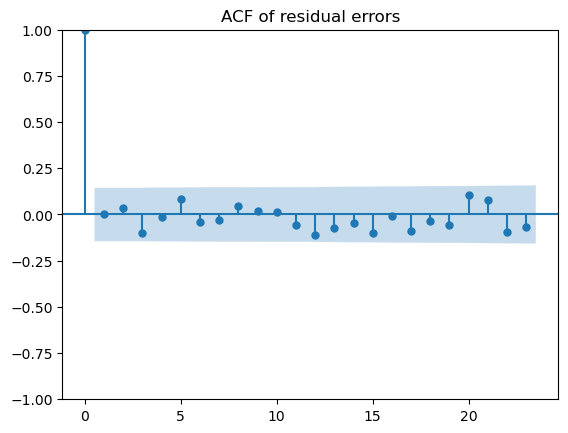

In [82]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(regressor_ini.resid,title='ACF of residual errors')
plt.show()

In [83]:
class  model_performance:
    def __init__(self,actual,predicted,count):
        self.actual=actual
        self.predicted=predicted
        self.count=count
    def mape(self):
        return (np.mean(np.abs((self.actual-self.predicted)/self.actual)))*(1/self.count)
    def mae(self):
        return (np.mean(np.abs(self.actual-self.predicted)))*(1/self.count)
    def mse(self):
        return (np.mean(np.abs(self.actual-self.predicted)))**2*(1/self.count)
    def rmse(self):
        return np.sqrt((np.mean(np.abs(self.actual-self.predicted)))**2*(1/self.count))
    
    

In [85]:
mp=model_performance(y_test,y_pred_ini,len(y_test))
regression_ini={'MODEL  NAME':['Regression_ini'],'MAPE':[mp.mape()],'MAE':[mp.mae()],'MSE':[mp.mse()],'RMSE':[mp.rmse()]}


In [86]:
regression_ini

{'MODEL  NAME': ['Regression_ini'],
 'MAPE': [0.03028669424958126],
 'MAE': [0.07225982182524934],
 'MSE': [0.41771854801734243],
 'RMSE': [0.6463114945731218]}

In [87]:
mp=model_performance(y_test,y_pred_tuned,len(y_test))
regression_tuned={'MODEL  NAME':['Regression_tuned'],'MAPE':[mp.mape()],'MAE':[mp.mae()],'MSE':[mp.mse()],'RMSE':[mp.rmse()]}


In [88]:
regression_tuned

{'MODEL  NAME': ['Regression_tuned'],
 'MAPE': [0.02975806594500348],
 'MAE': [0.07155233374983898],
 'MSE': [0.40957891720386774],
 'RMSE': [0.6399835288535696]}

In [89]:
final_result=pd.concat([pd.DataFrame(regression_ini),pd.DataFrame(regression_tuned)])

In [90]:
final_result

,MODEL NAME,MAPE,MAE,MSE,RMSE
0,Regression_ini,0.030287,0.072260,0.417719,0.646311
0,Regression_tuned,0.029758,0.071552,0.409579,0.639984
